In [1]:
import pandas as pd

In [18]:
data = pd.read_csv("https://covid19.isciii.es/resources/serie_historica_acumulados.csv", encoding='cp1252')
comunidad = 'AS'
cond = (data['CCAA']==comunidad) & (data['CASOS'].notnull()) & (data['Hospitalizados'].notnull()) & (data['UCI'].notnull()) & (data['Recuperados'].notnull()) & (data['Fallecidos'].notnull())
andalucia = data[cond]
andalucia['Activos'] = andalucia['CASOS'] - andalucia['Fallecidos'] - andalucia['Recuperados']

# Cambiar índice por la fecha
andalucia = andalucia.set_index('FECHA')

# Información del dataframe para ANDALUCÍA
#print(andalucia)

/home/bigdata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
# Lista de las comunidades autónomas
comunidades = list(set([col for col in data['CCAA'].tolist() if len(col)==2]))
print(comunidades)

['AN', 'GA', 'CE', 'CM', 'ML', 'AR', 'CT', 'IB', 'CN', 'AS', 'CB', 'EX', 'CL', 'RI', 'MC', 'PV', 'NC', 'VC', 'MD']


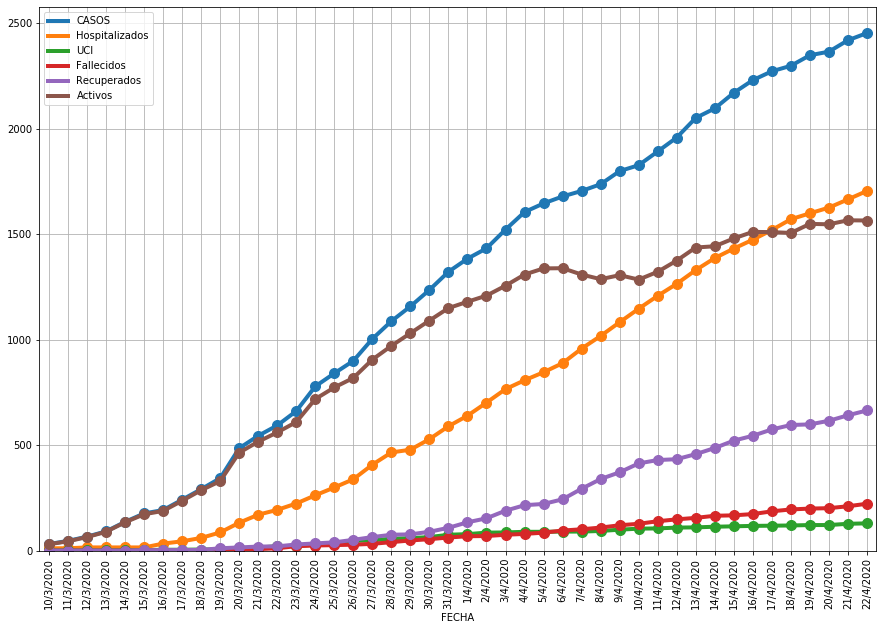

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax1 = andalucia.plot(kind='line', lw=4, grid=True, figsize=(15,10), ax=ax, style='.-', ms=20)
ax2 = andalucia.plot(kind='bar', alpha=0, lw=4, grid=True, figsize=(15,10), ax=ax, legend=None)

plt.show()
plt.clf()

In [21]:
# Define new daily cases ('New')
daily_list = []
for i, active in enumerate(andalucia['CASOS']):
    if i==0:
        daily_list.append(active)
    else:
        daily_list.append(active-prev_active)
    prev_active = active
    
andalucia['NUEVOS'] = daily_list

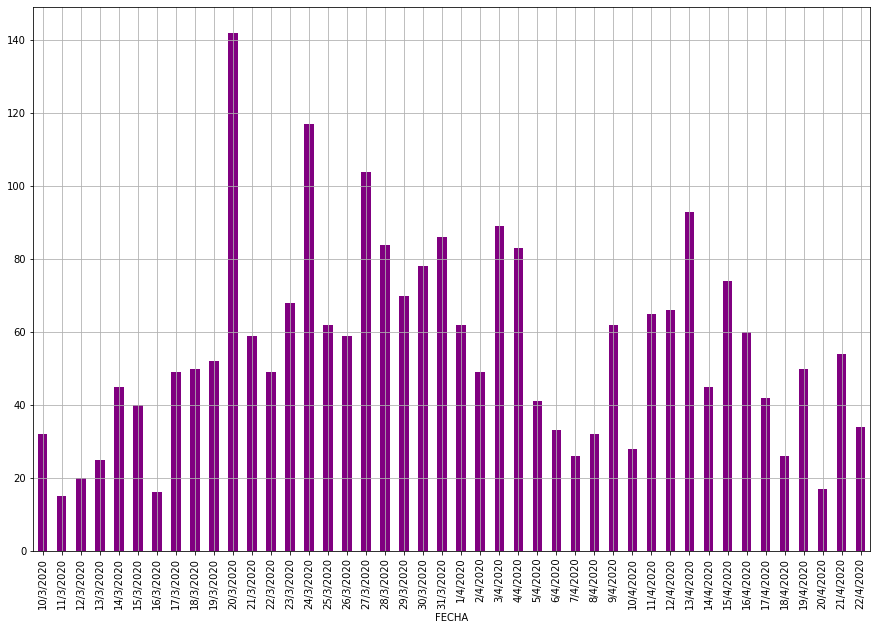

In [22]:
ax = plt.gca()
ax3 = andalucia['NUEVOS'].plot(kind='bar', alpha=1, color='purple', grid=True, figsize=(15,10), ax=ax, legend=None)

plt.show()